# Simple Linear Regression

- $x$ denotes the feature, the input variable

- $y$ denotes the target, the output variable

- $m$ is the size of the training set

- $(x^{(i)}, y^{(i)})$ is the $i^{th}$ training example

- Simple Linear Regression Equation is: (in-short, $f(x)$)
$$f_{w,b}(x) = w*x + b$$

- $w, b$ are the parameters of the model

- Predicted value for $i^{th}$ training example is:  
$$\hat y^{(i)} = f_{w,b}(x^{(i)}) = w*x^{(i)} + b$$

- Squared Error Cost Function:
$$J(w, b) = \frac{1}{2m} * \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

- To get the best fit line, $J(w, b)$ must be minimum

- To get the minimum cost, we use **Gradient Descent**, which helps to choose the parameters.

## Gradient Descent

(below image is taken from Course Files of MLS 1, offered by DeepLearning.AI on Coursera)

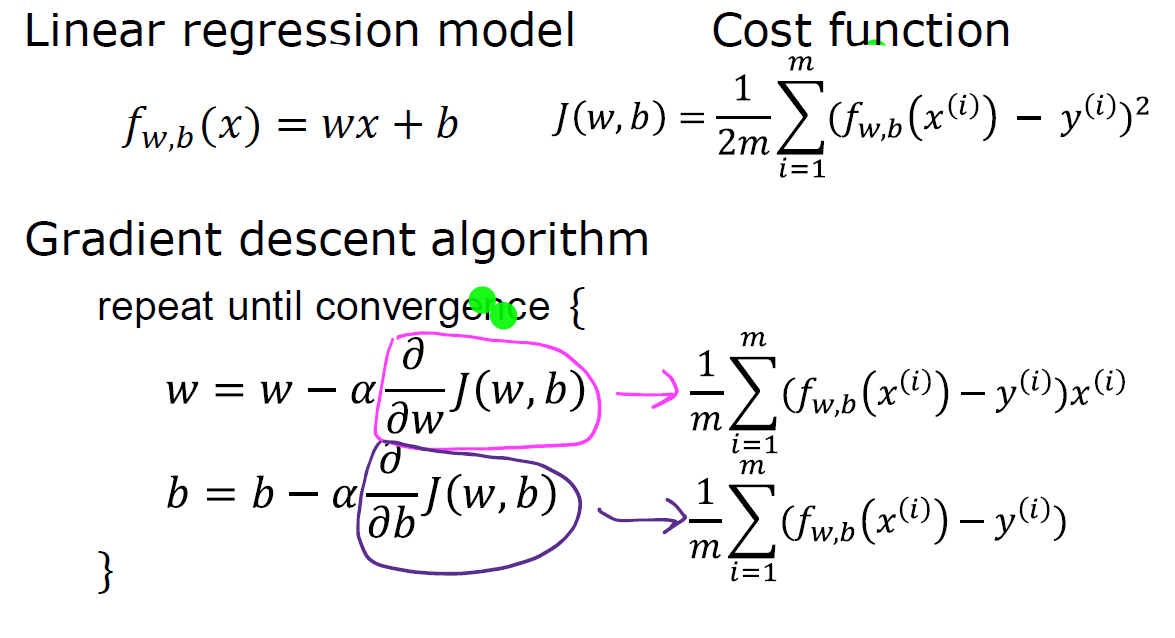

- Note that we do a simulataneous update.

- Now, we are going to implement the Simple Linear Regression model in Python, from scratch, with Gradient Descent.

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
dataset = pd.read_csv('Salary_data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# get features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [5]:
print(type(y))
print(y)

<class 'numpy.ndarray'>
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


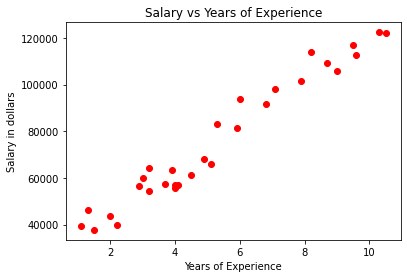

In [6]:
# visualize training data by plotting a scatter plot
plt.scatter(X, y, color = 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in dollars')
plt.title('Salary vs Years of Experience')
plt.show()

In [13]:
# Complete code implementing Simple Linear Regression with Gradient Descent
class SimpleLinearRegression():
    
    def __init__(self):
        # initialise parameters w, b
        self.w = 0
        self.b = 0
        
    def fit(self, X, y):
        '''
        Utility function to interact with the programmer.
        Input: X -> 2D numpy array of single feature.
        Input: y -> 1D numpy array of actual target values.
        Trains the model internally, returns nothing.
        '''
        self.run_gradient_descent(X, y)
    
    def predict(self, x):
        '''
        Calculates the estimated value for given input variable 'x'.
        Input: input variable (number) x.
        Returns: Estimated value of x for the existing model(y_hat).
        '''
        f = self.w * x + self.b
        return f
    
    def predict_multiple(self, x_new):
        '''
        Calculates the estimated values for given input variables 'x_new'.
        Input: x_new -> 2D numpy array for single feature.
        Returns: 1D numpy array of predictions.
        '''
        n = len(x_new)
        y_pred = []
        for i in range(n):
            y_pred_i = self.predict(x_new[i][0])
            y_pred.append(y_pred_i)
        return np.array(y_pred)
    
    def compute_gradient(self, X, y):
        '''
        Computes the gradients (partial derivates) wrt w, wrt b, for existing w, b; on training set X, y.
        Input: X -> feature 2D numpy array.
        Input: y -> target 1D numpy array.
        |X| = |y| = m.
        Returns: tuple of gradient wrt w, gradient wrt b.
        '''
        m = len(X)
        dj_dw, dj_db = 0, 0
        for i in range(m):
            x_i = X[i][0]
            y_actual_i = y[i]
            y_hat_i = self.predict(x_i)
            error_i = y_hat_i - y_actual_i
            dj_dw += error_i * x_i 
            dj_db += error_i
        dj_dw /= m
        dj_db /= m
        return (dj_dw, dj_db)
    
    def compute_cost_function(self, X, y):
        '''
        Computes Squared Error Cost Function value for the given training set, based on the existing model.
        Input: X -> 2D numpy array for the feature.
        Input: y -> 1D numpy array for the target.
        |X| = |y| = m.
        Returns: Squared Error Cost Function value, J(w, b).
        '''
        m = len(X)
        total_error = 0
        for i in range(m):
            x_i = X[i][0]
            y_actual_i = y[i]
            y_hat_i = self.predict(x_i)
            error = y_hat_i - y_actual_i
            total_error += (error ** 2)
        total_error /= (2 * m)
        return total_error
        
    # implementing gradient descent
    def run_gradient_descent(self, X, y, alpha = 0.001, threshold = 0.001, num_itr = int(1e6)):
        '''
        Input: X - 2d numpy array for the feature.
        Input: y - 1d numpy array for the target.
        (Optional) Input: alpha -> learning rate, by default 0.001.
        (Optional) Input: threshold -> to stop gradient descent, by default 0.001.
        (Optional) Input: num_itr -> number of iterations to run gradient descent, by default, 1e6.
        m - size of X, size of y (number of training examples).
        **Updates parameters w, b for the current model(current object)**.
        Returns: None.
        '''
        m = len(X)
        # choose random initial values for parameters
        self.w, self.b = 0, 0
        prev_w, prev_b = 0, 0
        for i in range(num_itr):
            dj_dw, dj_db = self.compute_gradient(X, y)
            self.w = self.w - (alpha * dj_dw)
            self.b = self.b - (alpha * dj_db)
            J = self.compute_cost_function(X, y)
            if (i + 1) % 1000 == 0 or i == 0:
                print(f'Iteration {i+1}, Cost Function: {J}')
            if i == num_itr - 1:
                print(f'Finally, Cost Function: {J}')
            if abs(prev_w - self.w) <= threshold and abs(prev_b - self.b) <= threshold:
                print('Stopping Gradient Descent because parameters are almost not changing.')
                print(f'Finally, Cost Function: {J}')
                break
            prev_w, prev_b = self.w, self.b
        print(f'Learned Parameters: w = {self.w}, b = {self.b}')

In [14]:
model = SimpleLinearRegression()
model.fit(X, y) # train the model

Iteration 1, Cost Function: 3022091606.9777923
Iteration 1000, Cost Function: 55957391.814032435
Iteration 2000, Cost Function: 42047073.989913225
Iteration 3000, Cost Function: 32935559.43184101
Iteration 4000, Cost Function: 26967349.460533675
Iteration 5000, Cost Function: 23058061.92830267
Iteration 6000, Cost Function: 20497406.5419928
Iteration 7000, Cost Function: 18820130.06811429
Iteration 8000, Cost Function: 17721483.06357514
Iteration 9000, Cost Function: 17001849.026264764
Iteration 10000, Cost Function: 16530475.46813741
Iteration 11000, Cost Function: 16221717.099603213
Iteration 12000, Cost Function: 16019474.677438812
Iteration 13000, Cost Function: 15887002.16335899
Iteration 14000, Cost Function: 15800230.225014795
Iteration 15000, Cost Function: 15743393.006091971
Iteration 16000, Cost Function: 15706163.580121724
Iteration 17000, Cost Function: 15681777.619929751
Iteration 18000, Cost Function: 15665804.366542526
Iteration 19000, Cost Function: 15655341.591168312
I

In [15]:
# making predictions
y_pred = model.predict_multiple(X)
print(y_pred)

[ 36183.203937    38073.33667444  39963.46941188  44688.80125548
  46578.93399292  53194.39857396  54139.46494268  56029.59768012
  56029.59768012  60754.92952372  62645.06226115  63590.12862987
  63590.12862987  64535.19499859  68315.46047347  72095.72594835
  73985.85868579  75875.99142323  81546.38963555  82491.45600427
  90051.98695403  92887.18606019 100447.71700994 103282.9161161
 108008.2479597  110843.44706586 115568.77890946 116513.84527818
 123129.30985922 125019.44259666]


In [16]:
# Visualise the results
res = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred
})
res

,Actual,Predicted
0,39343.0,36183.203937
1,46205.0,38073.336674
2,37731.0,39963.469412
3,43525.0,44688.801255
4,39891.0,46578.933993
5,56642.0,53194.398574
6,60150.0,54139.464943
7,54445.0,56029.597680
8,64445.0,56029.597680
9,57189.0,60754.929524


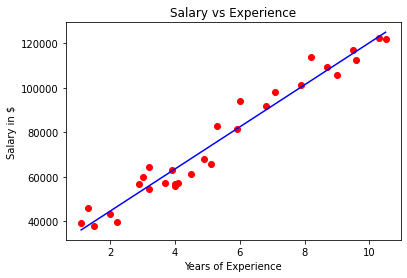

In [17]:
# plot the regression line on the scatter plot
plt.plot(X, y_pred, color = 'b')
plt.scatter(X, y, color = 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in $')
plt.title('Salary vs Experience')
plt.show()

> **NOTE:** I have not done the dataset splitting into training set and test set, for simplicity.